# Майнор Интеллектуальный анализ данных / Введение в анализ данных

## Домашнее задание 3. Логистическая регрессия и случайный лес.

В этом задании вам предстоит:
- поработать с логистической регрессией (полная реализация не потребуется, однако можно заработать бонусные баллы)
- воспроизвести подход случайного леса через одно решающее дерево, поэкспериментировать со случайным лесом.

На все вопросы требуется отвечать развёрнуто, аппелируя к полученным значениям или графикам, ответы вписывать в отдельную ячейку, выбрав для неё тип "Markdown". От полноты и качества ответов будет во многом зависеть ваша итоговая оценка.

Задание выполняется самостоятельно, плагиат будет стандартно наказываться лишением всех баллов за задание.
- Максимальная оценка за задание: 10 баллов.
- Дата выдачи: 28.04.2018
- Срок сдачи: 23:59 18.05.2018

In [32]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## Часть 0. Подготовка данных.

Для наших экспериентов возьмём обучающую выборку [отсюда](https://www.kaggle.com/iabhishekofficial/mobile-price-classification).

In [33]:
train = pd.read_csv('C:/Apps/train.csv')

Решается задача многоклассовой классификации — определение ценовой категории телефона. Для простоты перейдём к задаче бинарной классификации — пусть исходные классы 0 и 1 соответствуют классу 0 новой целевой переменной, а остальные классу 1.

Замените целевую переменную, отделите её в отдельную переменную и удалите из исходной выборки.

In [34]:
X = train.drop('price_range',axis=1)
y = train.iloc[:,-1].replace([0, 1, 2, 3], [0, 0, 1, 1])

Разделите выборку на обучающую и тестовую части в соотношении 7 к 3. Для этого можно использовать `train_test_split` из scikit-learn. Не забудьте зафиксировать сид для разбиения.

In [35]:
from sklearn.model_selection import train_test_split
X_train_tp, X_test_tp, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Часть 1. Логистическая регрессия.

[4 балла]

В этой части вы будете обучать самый простой бинарный классификатор — логистическую регрессию. Будем использовать готовую реализацию `LogisticRegression` из scikit-learn.

Логистическая регрессия — линейный метод, то есть в нём предсказание алгоритма вычислаяется как скалярное произведение признаков и весов алгоритма: 

$$
b(x) = w_0 + \langle w, x \rangle = w_0 + \sum_{i=1}^{d} w_i x_i
$$

Для вычисления вероятности положительного класса применяется сигмода. В результате предсказание вероятности принадлежности объекта к положительному классу можно записать как: 

$$
P(y = +1 | x) = \frac{1}{1 + \exp(- w_0 - \langle w, x \rangle )}
$$

Не забывайте, что для линейных методов матрицу объекты-признаки необходимо предварительно нормировать (то есть привести каждый признак к одному и тому же масштабу одним из способов). Для этого можно воспользоваться `StandardScaler` или сделать это вручную.

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_tp)
X_test = scaler.transform(X_test_tp)

Обучите логистическую регрессию. Сделайте предсказания для тестовой части, посчитайте по ним ROC-AUC и Accuracy (порог 0.5). Хорошо ли удаётся предсказывать целевую переменную? Да, хорошо

Не забывайте, что метод `predict_proba` вычисляет вероятности обоих классов выборки, а в бинарной классификации нас интересует в первую очередь вероятность принадлежности к положительному классу.

In [37]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)
y_predicted_proba = logmodel.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_auc_score, roc_curve
print('AUC-ROC: ', roc_auc_score(y_test, y_predicted_proba))

from sklearn.metrics import accuracy_score

print('Accuracy ',accuracy_score(y_test,y_predicted_proba>0.5))

AUC-ROC:  0.999409635199
Accuracy  0.983333333333


У обученной логистической регрессии есть два аттрибута: `coef_` и `intercept_`, которые соответствуют весам $w$ и $w_0$. Это и есть результат обучения логистической регрессии. Попробуйте с помощью них (с помощью всё той же обученной ранее логистической регрессии) посчитать "сырое" предсказание алгоритма $b(x)$. 

Постройте гистограмму полученных значений и ответьте на вопросы:
- Какие значения принимает такое предсказание? От -20 до 22 по оси x и от 0 до 37 по y.
- Похожи ли эти значения на вероятность классов? Нет. Вероятность не может быть отрицательной

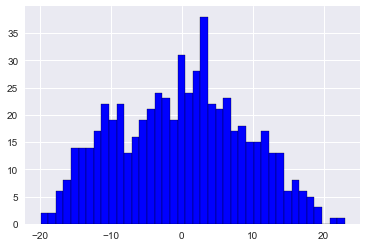

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

w = logmodel.coef_
w0 = logmodel.intercept_

y_pr = np.dot(X_test, w.reshape(-1)) + w0
plt.hist(y_pr, 40, color='b', edgecolor = 'black')
plt.show()

Реализуйте сигмоиду и постройте её график. Что вы можете сказать об этой функции?

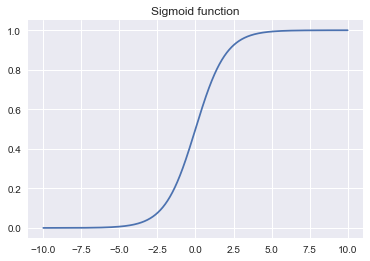

In [40]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(-10, 10, 1000)

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

plt.title('Sigmoid function')
plt.plot(x, sigmoid_function(x))
plt.show()

Сигмоида - функция, которая принимает значение 0 на -беск, 1/2 в нуле, 1 на +беск. Она монотонно возрастающая и гладкая функция.
Очень удобна для классификации, так как возвращает значения, лежащие от 0 до 1

Примените реализованную сигмоиду к $b(x)$. Вы должны получить вероятности принадлежности к положительному классу. Проверьте, что ваши значения совпали с теми, которые получены с помощью `predict_proba`.

In [61]:
import numpy as np
def b(x):
    return logmodel.intercept_ + np.dot(logmodel.coef_, x)

temp = []
for i in X_test:
    temp.append(b(i)[0])

pred = []
for i in temp:
    pred.append(sigmoid_function(i))

np.array_equal(float32(y_predicted_proba),np.array(pred,dtype=float32))

True

Таким образом, обучение логистической регрессии — настройка параметров $w$ и $w_0$, а применение — подсчёт вероятностей принадлежности положительному классу как применение сигмоды к скалярному произведению признаков и параметров.

Постройте для обученной логистической регрессии ROC-кривую `roc_curve` и PR-кривую `precision_recall_curve`.

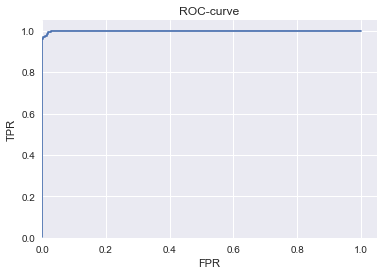

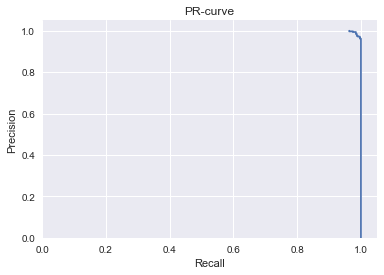

In [42]:
fpr,tpr,threshold = roc_curve(y_test,y_predicted_proba, pos_label=1)
plt.plot(fpr,tpr)
plt.title('ROC-curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.show()


from sklearn.metrics import precision_recall_curve as PR
precision, recall, thresholds = PR(
    y_test, y_predicted_proba)
plt.plot(precision,recall)
plt.title('PR-curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.show()

### Бонусное задание. Обучение логистической регрессии.

[2 бонусных балла]

Если выше вручную мы только применяли логистическую регрессию, то здесь предлагается реализовать обучение с помощью полного градиентного спуска.

Если кратко, то обучение логистической регрессии с $L_2$-регуляризацией можно записать следующим образом:

$$
Q(w, X) = \frac{1}{l} \sum_{i=1}^{l} \log (1 + \exp(- y_i \langle w, x_i \rangle )) + \frac{\lambda_2}{2} \lVert w \rVert _2^2 \to \min_w
$$

Считаем, что $y_i \in \{-1, +1\}$, а нулевым признаком сделан единичный (то есть $w_0$ соответствует свободному члену). Искать $w$ будем с помощью градиентного спуска:

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla_w Q(w, X)
$$

В случае полного градиентного спуска $\nabla_w Q(w, X)$ считается напрямую (как есть, то есть, используя все объекты выборки). Длину шага $\alpha > 0$ в рамках данного задания предлагается брать равной некоторой малой константе.

Градиент по объекту $x_i$ считается по следующей формуле:

$$
\nabla_w Q(w, x_i) = - \frac{y_i x_i}{1 + \exp(y_i \langle w, x_i \rangle)} + \lambda_2 w
$$

На самом деле неправильно регуляризировать свободный член $w_0$ (то есть при добавлении градиента для $w_0$ не надо учитывать слагаемое с $\lambda_2$). Но в рамках этого задания мы не обращаем на это внимания и работаем со всеми вектором весов одинаково. 

В качестве критерия останова необходимо использовать (одновременно):
- проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$) — параметр tolerance
- достижение максимального числа итераций (например, 10000) — параметр max\_iter.

Инициализировать веса можно случайным образом или нулевым вектором.

Реализуйте обучение логистической регрессии. Для удобства ниже предоставлен прототип с необходимыми методами. В `loss_history` необходимо сохранять вычисленное на каждой итерации значение функции потерь. 

In [149]:
from sklearn.base import BaseEstimator

class LogReg(BaseEstimator):
    def __init__(self, lambda_2=1.0, tolerance=1e-4, max_iter=1000, alpha=1e-3):
        """
        lambda_2: L2 regularization param
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        alpha: learning rate
        """
        self.lambda_2 = lambda_2
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.alpha = alpha
        self.w = None
        self.loss_history = None
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        size = X.shape[1]
        self.loss_history = []
        self.w = np.zeros(size)
        
        for i in range(self.max_iter):
            gradient = self.calc_gradient(X, y)
            self.loss_history.append(self.calc_loss(X,y))
            if np.linalg.norm(self.alpha * gradient, ord = 2 ) < self.tolerance or self.max_iter > 10000:
                break
            self.w -= self.alpha * gradient
            
        return self
    
    def predict_proba(self, X):
        """
        X: np.array of shape (l, d)
        ---
        output: np.array of shape (l, 2) where
        first column has probabilities of -1
        second column has probabilities of +1
        """
        if self.w is None:
            raise Exception('Not trained yet')
        
        answers = []
        probs = sigmoid_function(np.dot(X, self.w))
        for p in probs:
            answers.append([1.0-p,p])
        return np.array(answers)
    
    def calc_gradient(self, X, y):
       
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        size = X.shape[0]
        grad = - np.dot(X.T, y / (1 + np.exp(y * np.dot(X, self.w)))) / size + self.lambda_2 * self.w
        return grad
       

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        loss = np.log(1 + np.exp(-y* np.dot(X,self.w))).mean() + self.lambda_2/2 *  np.dot(self.w, self.w)
        return loss

1. Примените логистическую регресиию на той же выборке.
2. Посчитайте качество по тем же метрикам.
3. Визуализируйте изменение значений функции потерь от номера итераций.

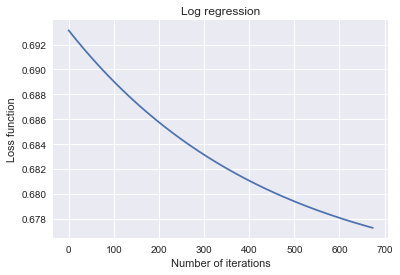

AUC-ROC:  0.994798106377
Accuracy  0.96


In [155]:
LR = LogReg()
LR.fit(X_train,y_train)
y_pred = LR.predict_proba(X_test)[:,1]

plt.title('Log regression')
plt.xlabel('Number of iterations')
plt.ylabel('Loss function')
plt.plot(LR.loss_history)

plt.show()
print('AUC-ROC: ', roc_auc_score(y_test, y_pred))
print('Accuracy ',accuracy_score(y_test,y_pred > 0.5))


## Часть 2. Случайные леса.

[6 баллов]

Случайный лес — алгоритм машинного обучения, представляющий собой бэггинг над решающими деревьями (усреднение ответов множества слабых алгоритмов) с 2 основными идеями:
- Использование подмножества признаков при построении каждого сплита дерева.
- Бутстрап обучающей выборки для построения каждого дерева (с повторениями).

В этом задании мы попробуем оценить пользу каждой из идей. Будем использовать ту же выборку с тем же разбиением на 2 части. Для начала обучите решающее дерево `DecisionTreeClassifier` из scikit-learn и посчитайте ROC-AUC и Accuracy (порог 0.5). Не забудьте зафикиксировать сид для построения дерева (несмотря на то, что в классической реализации никакой случайности нет, при большой глубине дерева может возникать неоднозначность в выборке признака в сплите). Используйте этот сид для всех заданий ниже.

In [44]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 101)
clf.fit(X_train,y_train)

y_predict_proba = clf.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_auc_score, roc_curve
print('AUC-ROC: ', roc_auc_score(y_test, y_predict_proba))

from sklearn.metrics import accuracy_score

print('Accuracy ',accuracy_score(y_test,y_predict_proba > 0.5))

AUC-ROC:  0.927151211362
Accuracy  0.926666666667


### 2.1 Бэггинг классификаторов

Реализуйте бэггинг над решающими деревьями (усреднение предсказанных вероятностей всего ансамбля). 
В качестве основы используйте всё тот же `DecisionTreeClassifier`. Количество базовых алгоритмов предлагается брать равным 100. 

Посчитайте качество с помощью тех же метрик. Ответьте на следующие вопросы:
- Что интересного вы видите? Улучшилось качество
- С чем это связано? За счет того, что много раз обучили множество деревьев и усреднили качество алгоритмов

In [58]:
np.random.seed(123)
clf = DecisionTreeClassifier()

res = np.zeros(X_test.shape[0])
for i in range(100):
    ind = np.random.choice(np.arange(X_train.shape[0]), size=X_train.shape[0], replace=False)
    clf.fit(X_train[ind],y_train.iloc[ind])
    res += clf.predict_proba(X_test)[:,1]

y_predict_proba = res / 100

print('AUC-ROC: ', roc_auc_score(y_test, y_predict_proba))
print('Accuracy ',accuracy_score(y_test,y_predict_proba > 0.5))

AUC-ROC:  0.93776106934
Accuracy  0.925


### 2.2 Сэмплирование обучающей выборки

Добавим к нашему бэггингу бутстрап выборки (генерация случайной выборки того же размера с возвращением). Для этого может пригодиться `numpy.random.randint`.

Посчитайте качество. Что вы видите? Качество улучшилось, так как мы ещё брали случайную подвыборку, и она могла повторяться, а не быть уникальной, как в пункте 2.1

In [59]:
np.random.seed(123)

clf = DecisionTreeClassifier()

res = np.zeros(X_test.shape[0])
for i in range(100):
    ind = np.random.choice(np.arange(X_train.shape[0]), size=X_train.shape[0], replace=True)
    clf.fit(X_train[ind],y_train.iloc[ind])
    res += clf.predict_proba(X_test)[:,1]

y_predict_proba = res / 100

print('AUC-ROC: ', roc_auc_score(y_test, y_predict_proba))
print('Accuracy ',accuracy_score(y_test,y_predict_proba > 0.5))

AUC-ROC:  0.995171261487
Accuracy  0.963333333333


### 2.3 Выбор случайного подмножества признаков

Временно забудем о бутстрапе выборки и добавим выбор случайного подмножества признаков при построении каждого сплита. В `DecisionTreeClassifier` за это отвечает параметр `max_features`. По умолчанию он имеет значение `None`, что обозначает использование всех возможных признаков. Для задачи классификации рекоменуется использовать квадратный корень от количества признаков. Попробуйте выставить такое значение. На этот раз надо отключить фиксированный сид в построении дерева, так как иначе каждый раз мы будем выбирать одинаковые подмножества признаков. 

Посчитайте качество. Что вы видите? Качество алгоритма лучше, чем при всех признаках у бэггинга

In [53]:
np.random.seed(123)  # для воспроизводимости построения случайных подмножеств признаков

clf = DecisionTreeClassifier(max_features='sqrt')

res = np.zeros(X_test.shape[0])
for i in range(100):
    clf.fit(X_train,y_train)
    res += clf.predict_proba(X_test)[:,1]

y_predict_proba = res / 100

print('AUC-ROC: ', roc_auc_score(y_test, y_predict_proba))
print('Accuracy ',accuracy_score(y_test,y_predict_proba > 0.5))

AUC-ROC:  0.992876636035
Accuracy  0.961666666667


### 2.4 = 2.2 + 2.3

Объединим два подхода (бутстрап + выбор подмножества признаков). Получим случайный лес.

Посчитайте качество. Что вы видите? Качество стало ещё выше. Это оказалось самым лучшим решением пока что

In [56]:
np.random.seed(123)  # для одинакового бутстрапа и выбора подмножеств признаков в каждом запуске

clf = DecisionTreeClassifier(max_features='sqrt')

res = np.zeros(X_test.shape[0])
for i in range(100):
    ind = np.random.choice(np.arange(X_train.shape[0]), size=X_train.shape[0], replace=True)
    clf.fit(X_train[ind],y_train.iloc[ind])
    res += clf.predict_proba(X_test)[:,1]

y_predict_pr = res / 100

print('AUC-ROC: ', roc_auc_score(y_test, y_predict_pr))
print('Accuracy ',accuracy_score(y_test,y_predict_pr > 0.5))

AUC-ROC:  0.993455861877
Accuracy  0.953333333333


То, что мы сделали уже реализовано в `RandomForestClassifier`. Попробуйте воспользоваться им. Количество используемых деревьев передаётся в параметре `n_estimators`.

Посчитайте качество. Что вы видите? Наш ручной алгоритм не проигрывает в качестве. Значит мы все сделали правильно

In [57]:
np.random.seed(123) 

from sklearn.ensemble import RandomForestClassifier
f_clr = RandomForestClassifier(n_estimators=100, max_features='sqrt')

f_clr.fit(X_train,y_train)

y_predicted = f_clr.predict_proba(X_test)[:,1]

print('AUC-ROC: ', roc_auc_score(y_test, y_predicted))
print('Accuracy ',accuracy_score(y_test,y_predicted > 0.5))

AUC-ROC:  0.992926761348
Accuracy  0.951666666667


### 2.5 Влияние количества используемых деревьев в случайном лесе

Один из параметров случайного леса — количество деревьев, используемых в бэггинге. Оценим, как влияет этот параметр на финальное качество. Для этого обучите случайные леса с разным количество деревьев (например, перебирайте от 10 до 1000 с шагом в 10), оцените качество с помощью ROC-AUC. Постройте график зависимости ROC-AUC от количества используемых деревьев. Что вы видите? По мере увеличения количества деревьев качество улучшается, но начиная с определенного момента качество уже перестает улучшаться и остается примерно на одном уровне 

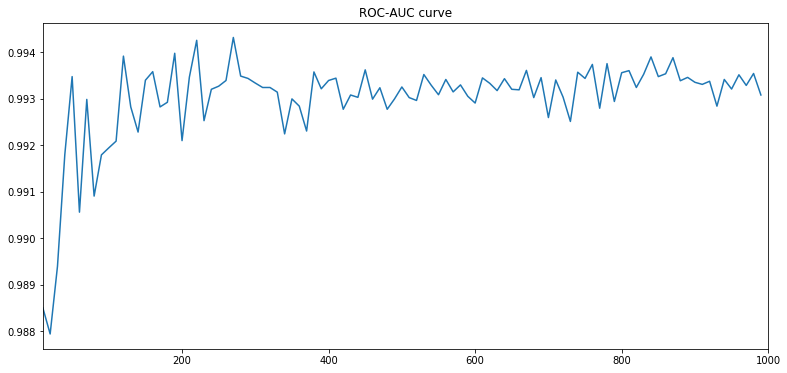

In [26]:
qty = []
estimator = np.arange(10,1000,10)

for e in estimator:
    clr_f = RandomForestClassifier(n_estimators = e)
    clr_f.fit(X_train, y_train)
    y_predict = clr_f.predict_proba(X_test)[:,1]
    roc = roc_auc_score(y_test, y_predict)
    qty.append(roc)

plt.figure(figsize=(13,6))
plt.plot(estimator, qty)
plt.title('ROC-AUC curve')

plt.xlim([10, 1000])
plt.show()

### 2.6 Важность признаков

Случайный лес позволяет оценить важность признаков. У обученного случайного леса есть аттрибут `feature_importances_`, где хранится важность для каждого признака. Постройте `barplot` с важностью признаков (удобно использовать библиотеку `seaborn`, где можно для каждого столбца передать название признака `train.columns`).

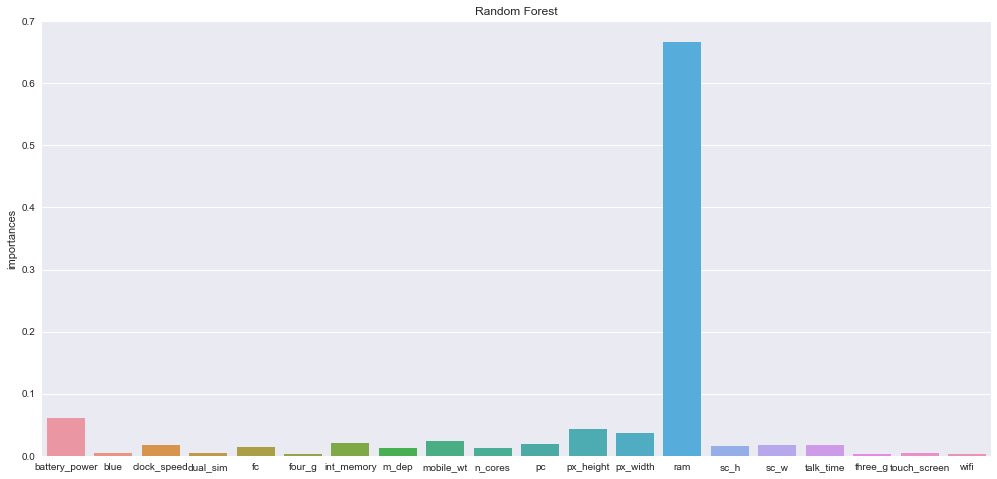

In [30]:
import seaborn as sns
important_features = clr_f.feature_importances_

plt.ylabel('importances')
plt.title('Random Forest')

sns.set(rc={'figure.figsize':(17, 8)})
sns.barplot(train.columns[:-1],important_features)

## Выводы

Напишите, что интересного вы узнали в этой работе, в каких экспериментах какие результаты получились.

Данная работа позволила узнать такие статистические модели, как логистическая регрессия и случайные леса. Мы их применяли для задачи классификации. Они обе показывают достаточно высокое качество, но логистическая регрессия показывает качество лучше, чем случайные леса.
В случайных лесах бэггинг, выбор случайного подмножества, бутстрап повышают качество моделей. Стоит отметить, что алгоритмы случайного леса работают дольше, чем регрессии. Суждение о том, что чем больше деревьев обучаем, тем лучше качество, опроверглось, так как после определенного количества деревьев качество уже не улучшалось
Также в этой работе мы изначально нормировали признаки, это несомненно увеличило качество моделей.